<span style="color:red">Assignment Grade: 6</span>

* 1) 4/4
* 2) 1/2 - improper syntax
* 3) 1/4 + 0/3 + 0/2 = 1/9
* code in (3) does not execute, the cases that do execute are inaccurate.
* where does tan come from in 3c? 
* euler plot does not make sense, 2nd order euler plot does not run. 
* 3ab inappropriate usage of f. 

## Mid-term exam

Consider the function $f(t, y) = \sin(t^2) - y$. 

**Part (1)**

(a) Define a sympy expression for $f$.  Using Sympy's *pprint* command, display the function. 

(b) Using Sympy, compute these partial derivatives of $f$: 
$$\frac{\partial f}{\partial t}  \hskip 1cm \frac{\partial f}{\partial y}$$  Display them using Sympy's *pprint* command. 
 
 

In [2]:
## (1) a
## setting variables

import sympy as sp 
t = sp.Symbol('t', real=True)
y = sp.Symbol('y')

def f(t, y):
    return sp.sin(t**2) - y
	
sp.pprint(f(t,y))


        ⎛ 2⎞
-y + sin⎝t ⎠


In [3]:
## (1) b
## creating functions as operators on other functions 

solPt = sp.diff(f(t,y), t)
solPy = sp.diff(f(t,y), y)  

sp.pprint(sp.simplify(solPt))
sp.pprint(sp.simplify(solPy))


       ⎛ 2⎞
2⋅t⋅cos⎝t ⎠
-1


**Part (2)**

Consider the **ODE**

$$\frac{dy}{dt} = f(t,y) = \sin(t^2) - y$$

 - (a) Can you solve it with Sympy's **dsolve** command?   If so, do it. What kind of solution does it give?   If not, show us how Sympy fails.  
 
 - (b) If possible, write out (as explicitly as you can) the unique solution with 
 $$y(0)=0$$


In [4]:
## (2) a
def df():
    return sp.diff(f(t,y))

ODE = sp.Eq( sp.Derivative( y(t), t), f(t,y))
sp.pprint(ODE)
solvD = sp.dsolve(ODE)


print(solvD)


sp.pprint(solvD)



d                  ⎛ 2⎞
──(y(t)) = -y + sin⎝t ⎠
dt                     
Eq(y(t), C1 - t*y + 3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*t/sqrt(pi))*gamma(3/4)/(8*gamma(7/4)))
                                  ⎛√2⋅t⎞       
                  3⋅√2⋅√π⋅fresnels⎜────⎟⋅Γ(3/4)
                                  ⎝ √π ⎠       
y(t) = C₁ - t⋅y + ─────────────────────────────
                             8⋅Γ(7/4)          


In [ ]:
## (2) b
## dsolve cannot give better exact answer as the derivative would be better suited by numerical solution versus analytical 
## solutions such like those of dsolve. 


This is the integral form of a solution.  Not terribly useful! 

The solution with $y(0)=0$ is the one with $c_1=0$, provided we take the integral as starting at $0$, i.e.

$$y(t) = e^{-t} \int_0^t e^t \sin(t^2)dt$$


**Part (3)**

Find numerical solutions to the ODE from Part 2, using

- (a) Euler's method. 

- (b) The 2nd-order Euler method. 

For parts (a) and (b) use the initial condition $y(0) = 0$. Approximate the solution on the interval $[0,20]$ using the three step sizes $\Delta t \in \{1/10, 1/100, 1/1000\}$.  

Print out your approximate value $y(20)$ for all six approximations. 

In [8]:
print(f)

<function f at 0x7fe188468730>


In [5]:
## 3 (a)
## euler Method numerical solution at y(20)
def stepsE(y, dt):
    return y + dt*(f) ## what is f doing here? 

def buildEst(f2, y0, a, b, n):
    dt = (b-a)/n
    xret = [a]
    yret = [y0]
    y = y0
    for i in range(n):
        y = f(y, dt)
        xret.append(xret[-1] + dt)
        yret.append(y)
    return (xret, yret) 


print(buildEst(stepsE, 0, 0, 20, 200)[1][-1]) ## edited by grader
print(buildEst(stepsE, 0, 0, 20, 2000)[1][-1])
print(buildEst(stepsE, 0, 0, 20, 20000)[1][-1])

print(buildEst(stepsE,20,0,20,200)[1][-1])
print(buildEst(stepsE,20,0,20,2000)[1][-1])
print(buildEst(stepsE,20,0,20,20000)[1][-1])

-0.0916080615601707
-0.00990195135943253
-0.000999001995013958


RecursionError: maximum recursion depth exceeded

In [65]:
## 3 (b) 
## second order Euler Function
def steps2E(y, dt):
    return y + dt* f + (dt**2)*(y*f)


                                

In [66]:
print(buildEst(steps2E, 0, 0, 20, 200))
print(buildEst(steps2E, 0, 0, 20, 2000))
print(buildEst(steps2E, 0, 0, 20, 20000))
                                     
print(buildEst(steps2E,20,0,20,200))
print(buildEst(steps2E,20,0,20,2000))
print(buildEst(steps2E,20,0,20,20000))  

([0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998, 5.099999999999998, 5.1999999999999975, 5.299999999999997, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999995, 5.899999999999995, 5.9

RecursionError: maximum recursion depth exceeded while calling a Python object

(c) Plot your approximate solutions on the domain $[0,20]$. 

(d) Which method appears to be the most accurate, if you can tell? 

(e) Do any of your solutions give insights into the long-term behaviour of $y(t)$, i.e. $$\lim_{t \to \infty} y(t) ? $$
Include your results from Part (2) in this analysis. 

<IPython.core.display.Javascript object>


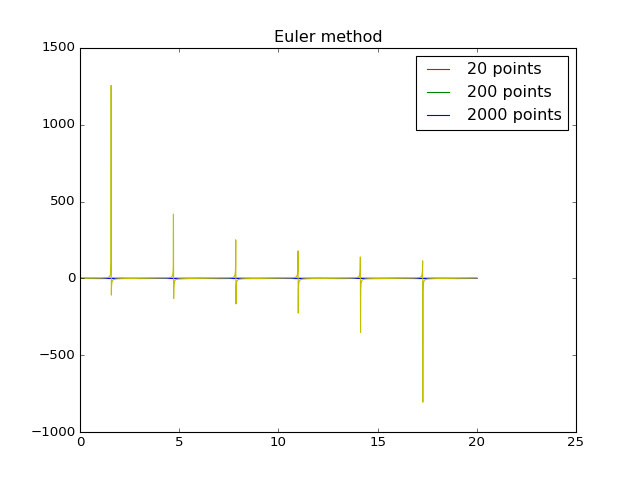

-0.206425029528623
-0.0916080615601707
-0.00990195135943253
-0.00990195135943253


In [6]:
## 3 (c)
## defining a function to clean up the data for plotting
def solPlot(a,b,n):
    dt = (b-a)/n
    xvals = [a + i*dt for i in range(n+1)]
    yvals = [np.tan(xv) for xv in xvals]
    return (xvals, yvals)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

steplens = [20, 200, 2000]
pltcol = ['r-', 'g-', 'b-']
datList = []

for n in steplens:
    datList.append(buildEst(stepsE, 0, 0, 20, n))

for i in range(len(datList)):
    plt.plot(datList[i][0], datList[i][1], pltcol[i], label=str(steplens[i])+" points")

xv, yv = solPlot(0,20,2000)
plt.plot(xv, yv, 'y-')

plt.legend()
plt.title("Euler method")

for P in datList:
    print(P[1][-1])


print(buildEst(stepsE, 0, 0, 20, 2000)[1][-1])

In [7]:
plt.close()

datList = []

for n in steplens:
    datList.append(buildEst(steps2E, 0, 0, 20, n))

for i in range(len(datList)):
    plt.plot(datList[i][0], datList[i][1], pltcol[i], label=str(steplens[i])+" points")
    
xv, yv = solPlot(0,20,2000)
plt.plot(xv, yv, 'y-')

plt.legend()
plt.title("2nd-order Euler method")
for P in datList:
    print(P[1][-1])

NameError: name 'steps2E' is not defined

In [ ]:
 

## 3(d) I cannot see much difference in accuracy for this data. it could be logic error in my code that is creating answers 
## that seem to similar as my expectation is that the second order method would be more accurate

## 3(e)  from the plots if my answers are correct it would seem the functions tend to oscilate. meaning the limit does not exist



### Answers to  3 (d) and (e)

*put here*


## Euler approximations - Reminder

The Euler method and its variations was the subject of your second homework assignment.  The *plain* first-order Euler method was based upon the approximation

$$y(t + \Delta t) \simeq y(t) + (\Delta t)f(t,y(t))$$

where we divide the time-domain interval $[a,b]$ into $n$ equal-length sub-intervals of length $\Delta t = \frac{b-a}{n}$.  


The second-order Euler method is the approximation

$$ y(t + \Delta t) \simeq y(t) + (\Delta t)f(t, y(t)) + \frac{\Delta t^2}{2} \bigg( \frac{\partial f}{\partial t}(t,y(t)) + \frac{\partial f}{\partial y}(t,y(t)) f(t,y(t)) \bigg)$$
